In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\thris\\Downloads\\archive (2)\\bowling_stats_for_icc_mens_t20_world_cup_2024.csv")
df.head()

,Player,Team,Mat,Inns,Balls,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,5,10,Ct
0,NP Kenjige,United States of America,4,4,60,0,89,3,30-Mar,29.66,8.90,20,0,0,0
1,Abbas Afridi,Pakistan,1,1,18,0,31,0,-,0.00,10.33,-,0,0,0
2,MR Adair,Ireland,3,3,72,0,74,3,23-Jan,24.66,6.16,24,0,0,1
3,AC Agar,Australia,2,2,48,1,56,1,Jan-39,56.00,7.00,48,0,0,1
4,DS Airee,Nepal,3,3,57,0,49,6,21-Mar,8.16,5.15,9.5,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Team    162 non-null    object 
 2   Mat     162 non-null    int64  
 3   Inns    162 non-null    int64  
 4   Balls   162 non-null    int64  
 5   Mdns    162 non-null    int64  
 6   Runs    162 non-null    int64  
 7   Wkts    162 non-null    int64  
 8   BBI     162 non-null    object 
 9   Ave     162 non-null    float64
 10  Econ    162 non-null    float64
 11  SR      162 non-null    object 
 12  5       162 non-null    int64  
 13  10      162 non-null    int64  
 14  Ct      162 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 19.1+ KB


In [5]:
df.Team.value_counts()

Team
New Zealand                 11
Nepal                       10
Afghanistan                 10
United States of America     9
England                      9
Papua New Guinea             9
Uganda                       9
Australia                    8
Oman                         8
India                        8
Pakistan                     8
Scotland                     7
Canada                       7
Sri Lanka                    7
Netherlands                  7
South Africa                 7
West Indies                  7
Namibia                      7
Ireland                      7
Bangladesh                   7
Name: count, dtype: int64

In [7]:
df.groupby(["Player","Team"])["Wkts"].max().sort_values(ascending=False).head(10)

Player            Team        
Fazalhaq Farooqi  Afghanistan     17
Arshdeep Singh    India           17
JJ Bumrah         India           15
A Nortje          South Africa    15
Rishad Hossain    Bangladesh      14
Rashid Khan       Afghanistan     14
Naveen-ul-Haq     Afghanistan     13
A Zampa           Australia       13
K Rabada          South Africa    13
AS Joseph         West Indies     13
Name: Wkts, dtype: int64

In [10]:
df.groupby(["Player","Team","Balls"])["Runs"].max().sort_values(ascending=False).head(10)

Player          Team                      Balls
Arshdeep Singh  India                     180      215
M Jansen        South Africa              187      213
A Nortje        South Africa              210      201
K Rabada        South Africa              186      195
Rishad Hossain  Bangladesh                150      194
HH Pandya       India                     150      191
JC Archer       England                   158      190
A Zampa         Australia                 168      187
AU Rashid       England                   168      186
Ali Khan        United States of America  116      181
Name: Runs, dtype: int64

In [12]:
df.groupby(["Player","Team","Balls"]).agg({"Runs": "min", "Wkts": "max"}).sort_values("Runs", ascending=False).head(10)

,,,Runs,Wkts
Player,Team,Balls,,
Arshdeep Singh,India,180,215,17
M Jansen,South Africa,187,213,7
A Nortje,South Africa,210,201,15
K Rabada,South Africa,186,195,13
Rishad Hossain,Bangladesh,150,194,14
HH Pandya,India,150,191,11
JC Archer,England,158,190,10
A Zampa,Australia,168,187,13
AU Rashid,England,168,186,10


In [16]:
df.groupby(["Team"]).agg(
    matches_count=("Mat", "count"),
    total_runs=("Wkts", "max")
).sort_values(by="total_runs", ascending=False)

,matches_count,total_runs
Team,,
Afghanistan,10,17
India,8,17
South Africa,7,15
Bangladesh,7,14
Australia,8,13
West Indies,7,13
England,9,10
New Zealand,11,9
Sri Lanka,7,8


In [19]:
df.groupby(["Player","Team"])["Econ"].min().sort_values(ascending=False).head(10)

Player        Team                    
Fayyaz Butt   Oman                        24.00
Milind Kumar  United States of America    22.00
WG Jacks      England                     22.00
B Shikongo    Namibia                     19.00
S Bau         Papua New Guinea            18.00
DJ Mitchell   New Zealand                 17.50
JT Brassell   Namibia                     17.25
Bilal Hassun  Uganda                      17.00
N Dutta       Canada                      15.37
Pargat Singh  Canada                      15.00
Name: Econ, dtype: float64

In [21]:
player=input("Player name to know wickets:")
d1=df[df["Player"]==player]
res=d1["Wkts"]
res

106    11
Name: Wkts, dtype: int64

In [24]:
team=input("Team name to view players:")
d2=df[df["Team"]==team]
ress=d2[["Player","Wkts","Runs","Econ"]]
ress

,Player,Wkts,Runs,Econ
11,Arshdeep Singh,17,215,7.16
23,JJ Bumrah,15,124,4.17
33,S Dube,0,11,11.00
55,RA Jadeja,1,106,7.57
68,Kuldeep Yadav,10,139,6.95
91,Mohammed Siraj,1,57,5.18
106,HH Pandya,11,191,7.64
108,AR Patel,9,173,7.86


In [26]:
df.groupby(["Player","Team"])["SR"].max().sort_values(ascending=False).head(10)

Player            Team        
DS Airee          Nepal           9.5
T Shamsi          South Africa    9.1
B White           Ireland           9
R Ravindra        New Zealand       9
RA Jadeja         India            84
Fazalhaq Farooqi  Afghanistan     8.9
CJ Jordan         England         8.3
Mehran Khan       Oman              8
N Thushara        Sri Lanka         8
Saad Bin Zafar    Canada           72
Name: SR, dtype: object

<Axes: xlabel='Wkts', ylabel='Count'>

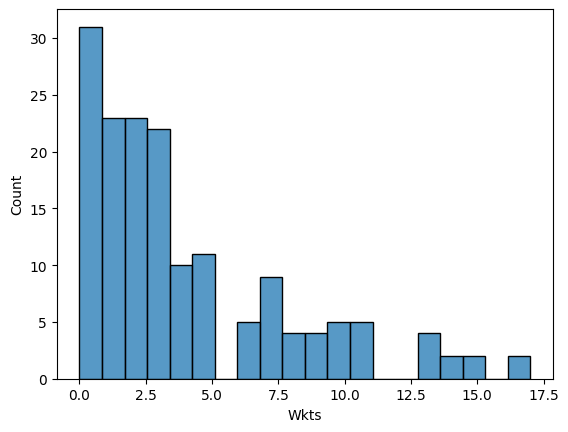

In [28]:
sns.histplot(x=df.Wkts,bins=20)